# K Means Clustering 
---
---
 Mathematical Understanding

- K Means Clustering is an unsupervised learning method that clusters data set into k different clusters. Each sample is assigned to the cluster with the nearest mean, and then the means (centroids) and clusters are updated
during an iterative optimization process.

### Principles and Assumptions:

- In K Means Clustering, we partition a given dataset into K clusters, where each data point belongs to the cluster with nearest mean or the centroid. The algorithm aims to minimize the within-cluster sum of squared distances between data points and their assigned centroids.

- It assumes that clusters are spherical and have similar sizes.

- It also assumes that each data point belongs to only one cluster

- It assumes that the cluster denisty is uniform.

- It also assumes that the variance of each feature is same for the cluster.


### Mathematical Explanation:

- Euclidean Distance: The Euclidean distance between two data points x and y in n-dimensional space is calculated as:

        distance(x, y) = sqrt(sum((x_i - y_i)^2)) for i = 1 to n

- Mean Calculation: The centroid of a cluster is updated by calculating the mean of all data points in that cluster for each feature


### How model learns and makes predictions:

- The model learns by iteratively updating the centroids until convergence or the number of iterations are reached. It minimizes the within-cluster sum of squared distances, in order to find centroids that best represent the clusters in the data.

- Once the centroids have been learned, new data points are assigned to clusters based on their distances from the centroids. During the prediction phase, the algorithm calculates the distance between each data point and all centroids, then assigns the data point to the cluster represented by the closest centroid.

---


# Training and Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class MyKMeansClustering:

    def __init__(self, K=2, max_iterations=1000, plotting=False):
        self.K = K
        self.max_iterations = max_iterations
        self.plotting = plotting

        # no of clusters to be initialised by list comprehension
        self.clusters = [[] for _ in range(self.K)]

        # the centers (mean vector) for each cluster
        self.centroids = []


    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize the centroids
        if len(self.centroids) != self.K :          # for training data the centroids are the randomised points from the data itself,
                                                    # but for testing data we use centroids from training data instead of test data pointsa
            random_sample_ids = np.random.choice(self.n_samples, self.K, replace=False)        
            self.centroids = [self.X[id] for id in random_sample_ids]

        # optimization of clusters
        for _ in range(self.max_iterations):
            self.clusters = self.create_clusters(self.centroids)    # samples are assigned to closest centroids in order to create cluster

            if self.plotting:
                self.plot()

             # calculate new centroids from the clusters
            centroids_old = self.centroids                         
            self.centroids = self.get_centroids(self.clusters)

            if self.is_converged(centroids_old, self.centroids):
                self.plot()                 #for final plot of clusters
                break

            if self.plotting:           #to plot our clusters in each step
                self.plot()

        # classify samples as the index of their clusters
        return self.get_clusters(self.clusters)


    def get_clusters(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples, dtype = int)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx

        return labels


    def create_clusters(self, centroids):
        # assign the samples to the closest centroids
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self.closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1-x2)**2))

    def closest_centroid(self, sample, centroids):
        # distance of the sample from each centroid
        distances = [self.euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx


    def get_centroids(self, clusters):
        # mean value of clusters is assigned to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def is_converged(self, centroids_old, centroids):
        # distances between old and new centroids, for all centroids
        distances = [self.euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(10, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()

    def fit_acc_to_label(self, predictions, y_test):        # used to check how accurately we grouped our data

        accuracy_1 = np.mean(predictions == y_test)
        inverted_predictions = (predictions * -1) + 1
        accuracy_2 = np.mean(inverted_predictions == y_test)
        if accuracy_1 > accuracy_2:
            return predictions
        else:
            return inverted_predictions
        
    def silhouette_score(self):
        
        labels = self.get_clusters(self.clusters)       #to get to know which point belongs to which cluster
        n_samples = len(self.X)
        silhouette_vals = []

        for i in range(n_samples):
            a_i = 0
            b_i = np.inf
            label_i = labels[i]
            for j in range(n_samples):
                if i != j:
                    label_j = labels[j]
                    if label_i == label_j:
                        a_i += self.euclidean_distance(self.X[i], self.X[j])
                    else:
                        b_i = min(b_i, self.euclidean_distance(self.X[i], self.X[j]))
            a_i /= (len(self.clusters[label_i]) - 1)
            b_i /= len(self.clusters[label_i])
            silhouette_vals.append((b_i - a_i) / max(a_i, b_i))

        return np.mean(silhouette_vals)

            


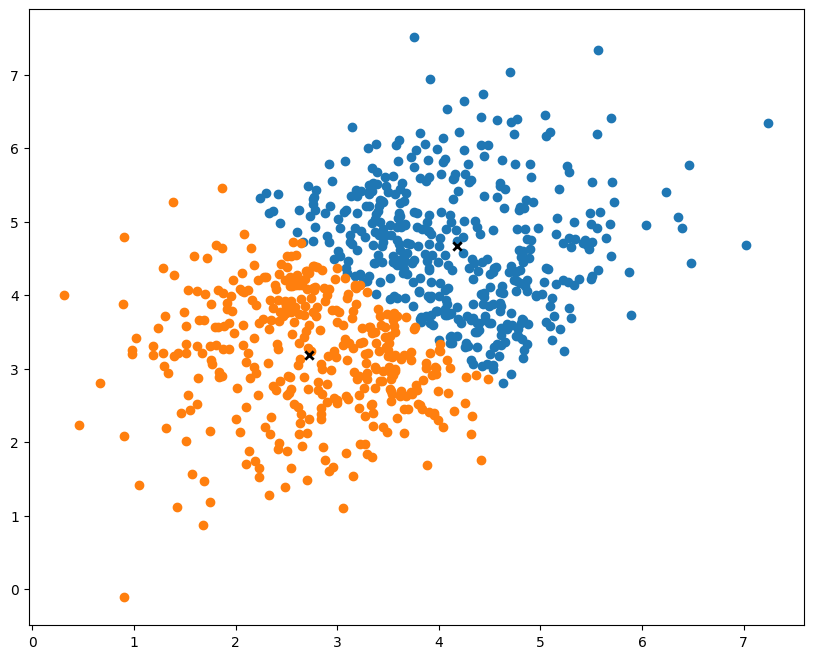

For training data, accuracy =  0.51


In [3]:
model = MyKMeansClustering(K = 2, plotting = False)
train = pd.read_csv('ds2_train.csv')

X_train = train[['x_1', 'x_2']].to_numpy()
y_train = train['y'].to_numpy()

predictions_training = model.fit_acc_to_label(model.predict(X_train), y_train)      # stores the class labels which are returned by the model
print("For training data, accuracy = ", np.mean(predictions_training == y_train))   # here model's predictions are compared with the actual class labels

Graph for clusters based on training Data


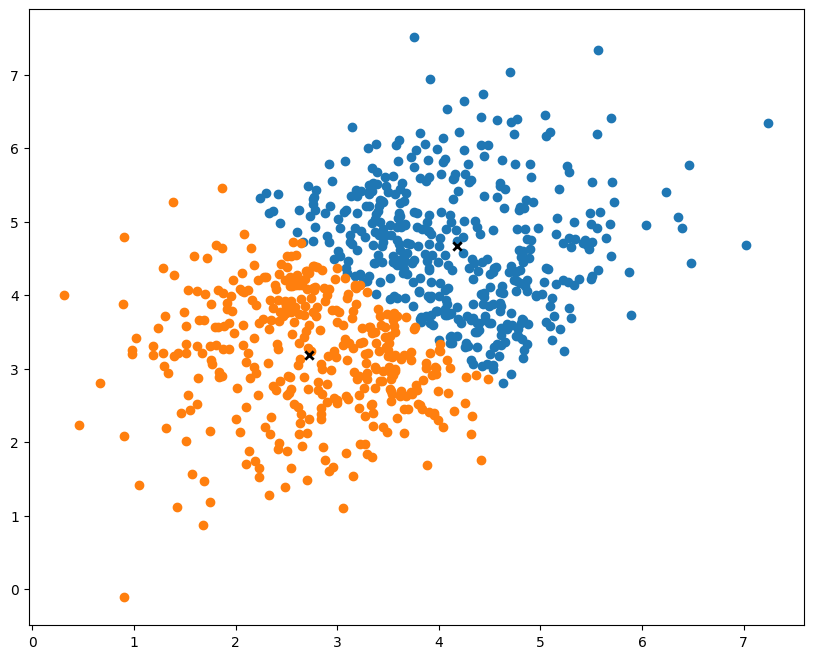

Graph for clusters based on test Data


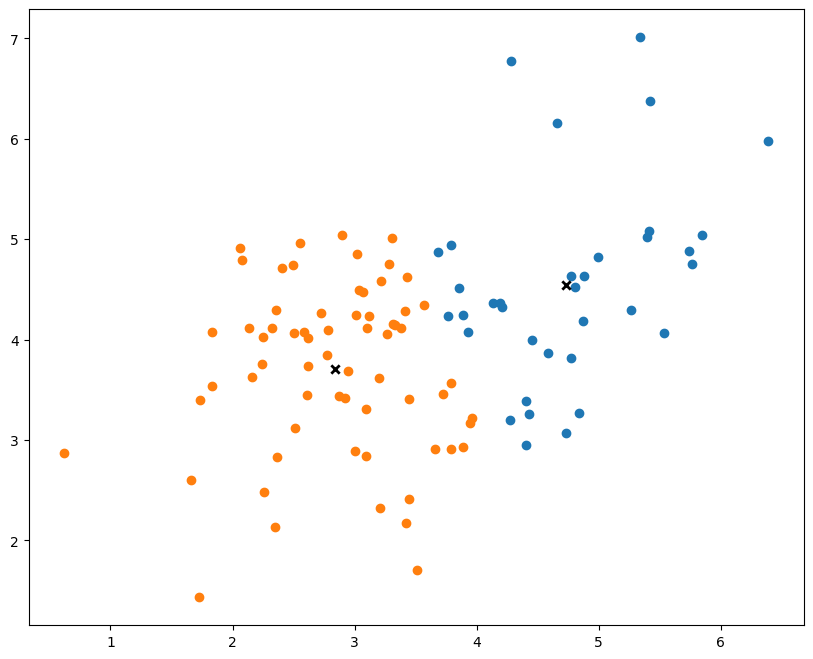

For Test Data, accuracy =  0.71


In [4]:
print('Graph for clusters based on training Data')
model.predict(X_train)
test = pd.read_csv('ds2_test.csv')
X_test = test[['x_1', 'x_2']].to_numpy()
y_test = test['y'].to_numpy()

print('Graph for clusters based on test Data')
predictions_test = model.fit_acc_to_label(model.predict(X_test), y_test)
print('For Test Data, accuracy = ', np.mean(predictions_test == y_test))

----
# Hyperparameter Tuning

- The Hyper-parameters which affect the K-Means clustering algorithm is K value. (no of iterations won't affect our model much as i have an is_converged method to calculate convergence which would get activated once the centroids are almost constant) 

## Fine tuning K value to perform using grid search and evaluation using silhouette coefficient
    
- The evaluation metric that I have used here is silhouette score which measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score means that the clusters are well separated from each other and better defined.

        s = (b-a) / max(a, b)
        where a is the mean distance between a sample and all other points in the same cluster
        b is the mean distance between a sample and all other points in the nearest cluster

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
train = pd.read_csv('ds2_train.csv')
X_train = train[['x_1', 'x_2']].to_numpy()

In [7]:
K_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
best_K_value = None
best_silhouette_coefficient = -1

Graph for K value = 2


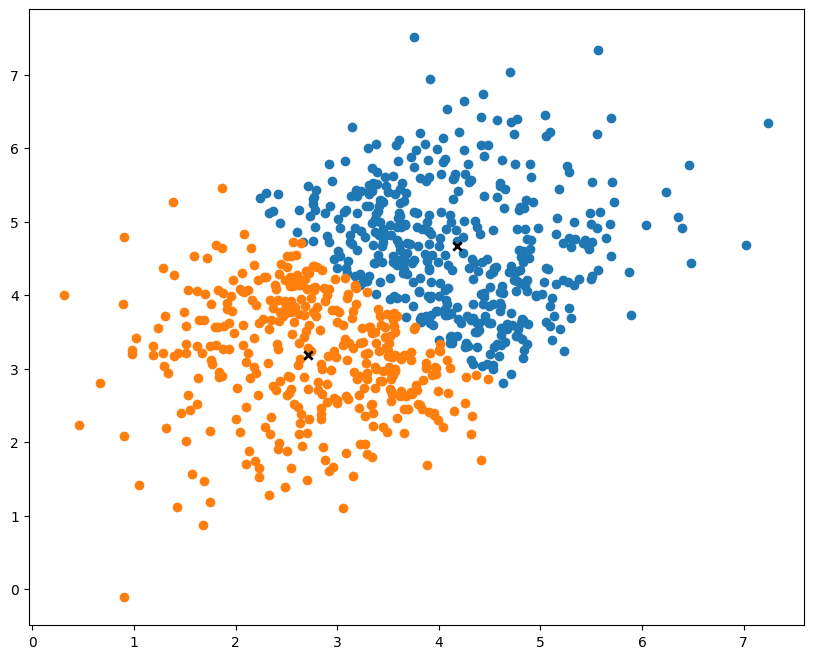

Graph for K value = 3


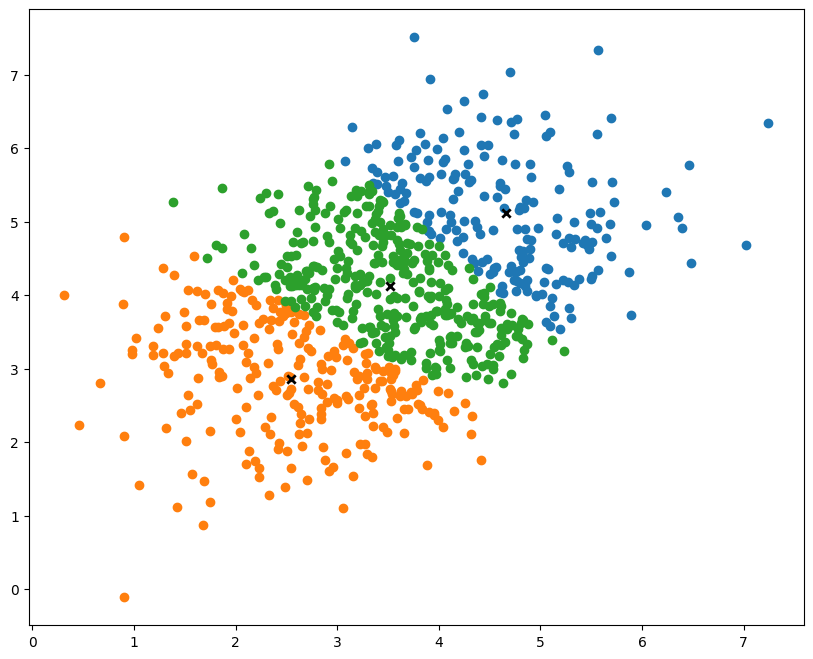

Graph for K value = 4


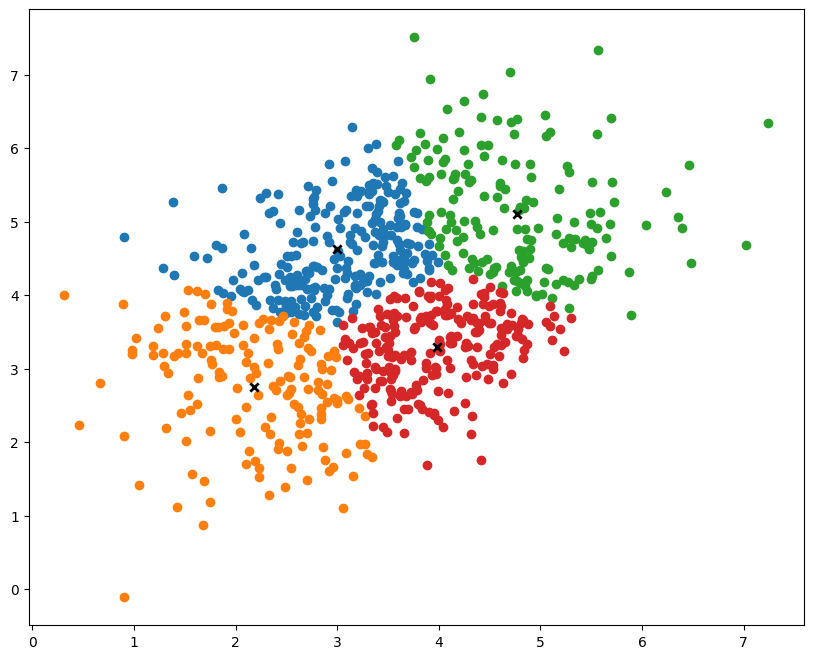

Graph for K value = 5


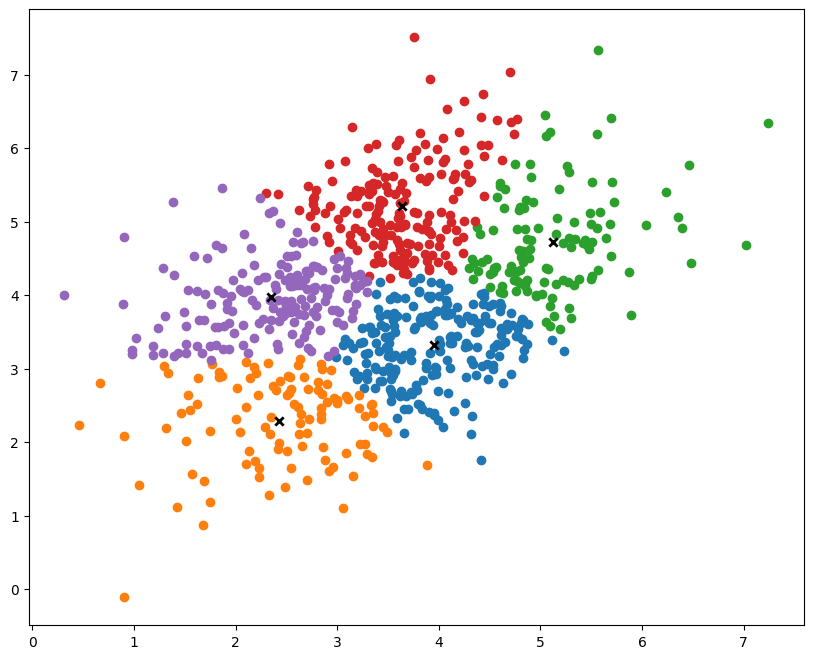

Graph for K value = 6


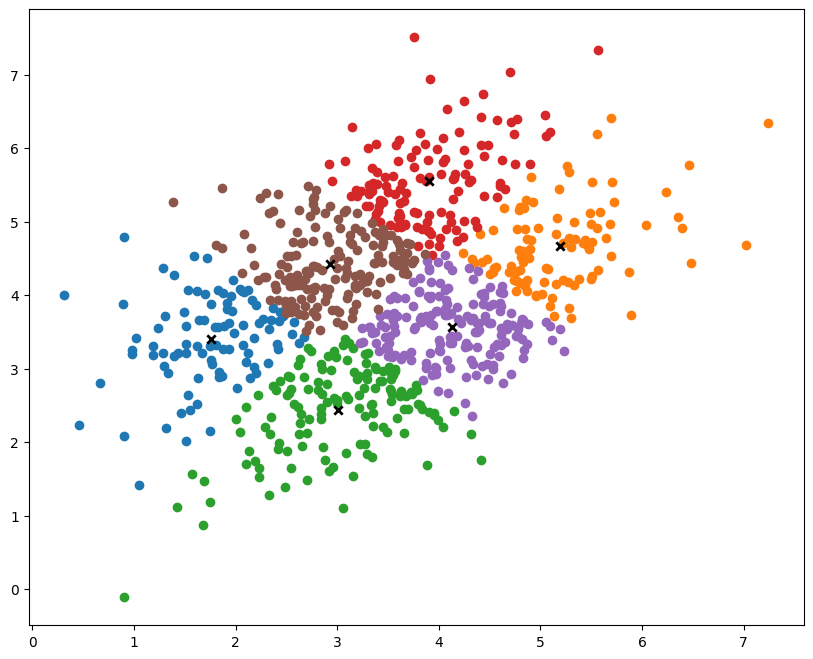

Graph for K value = 7


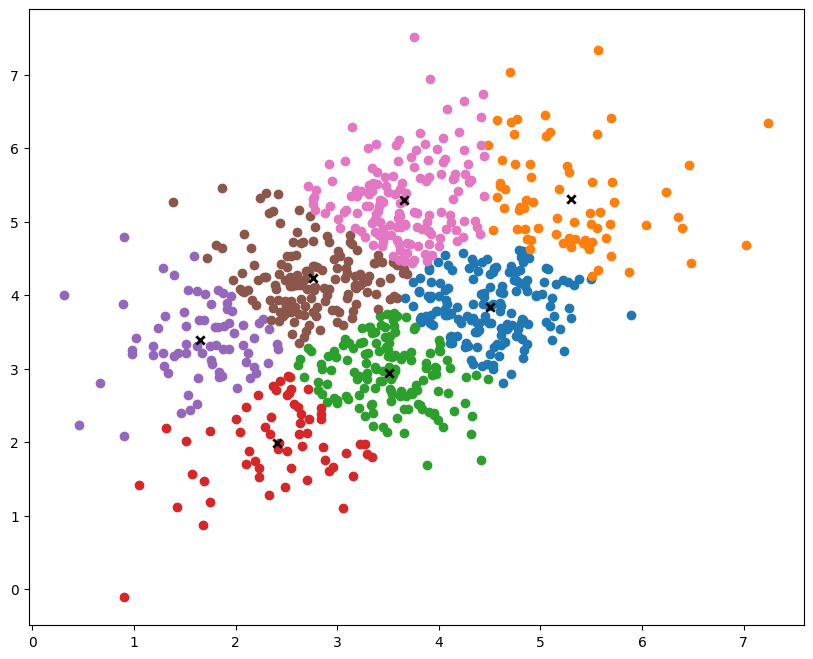

Graph for K value = 8


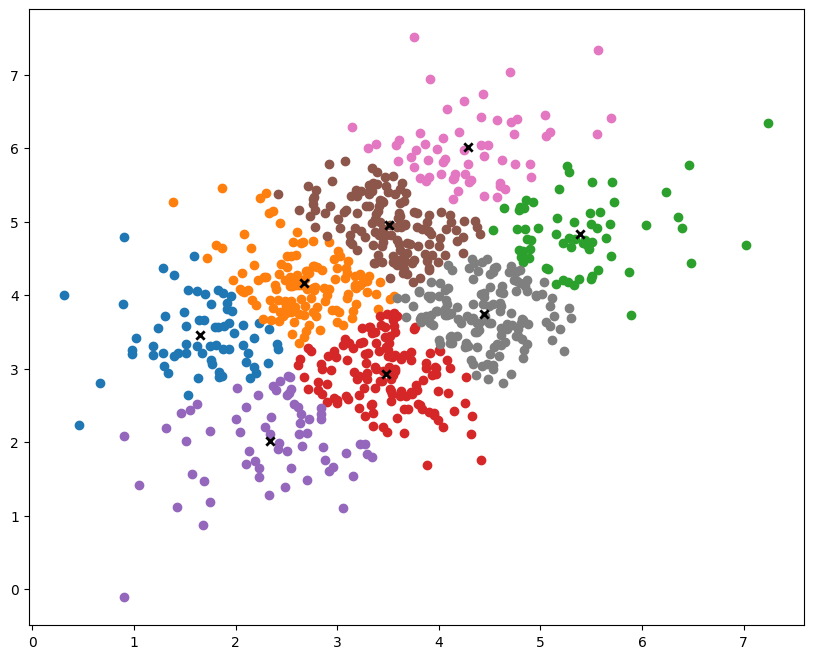

Graph for K value = 9


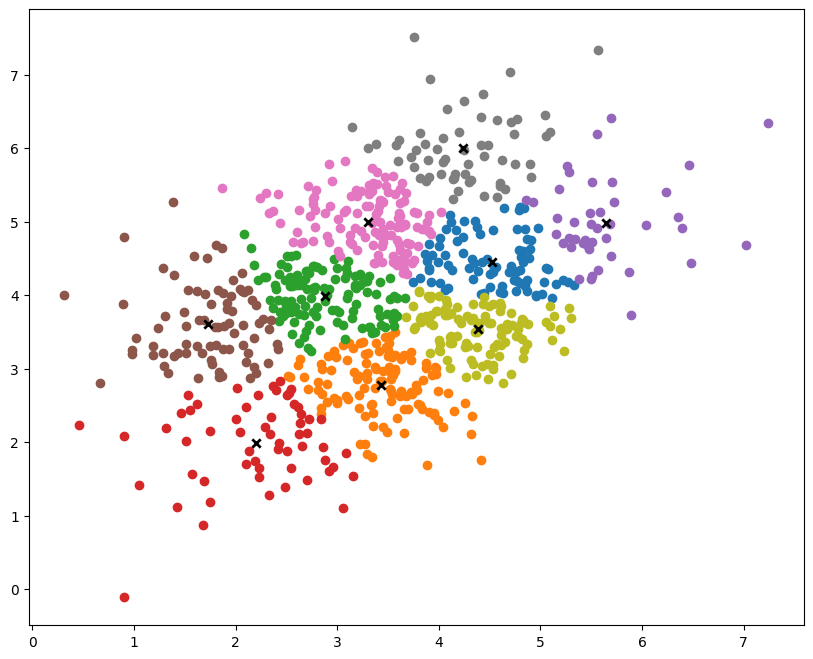

Graph for K value = 10


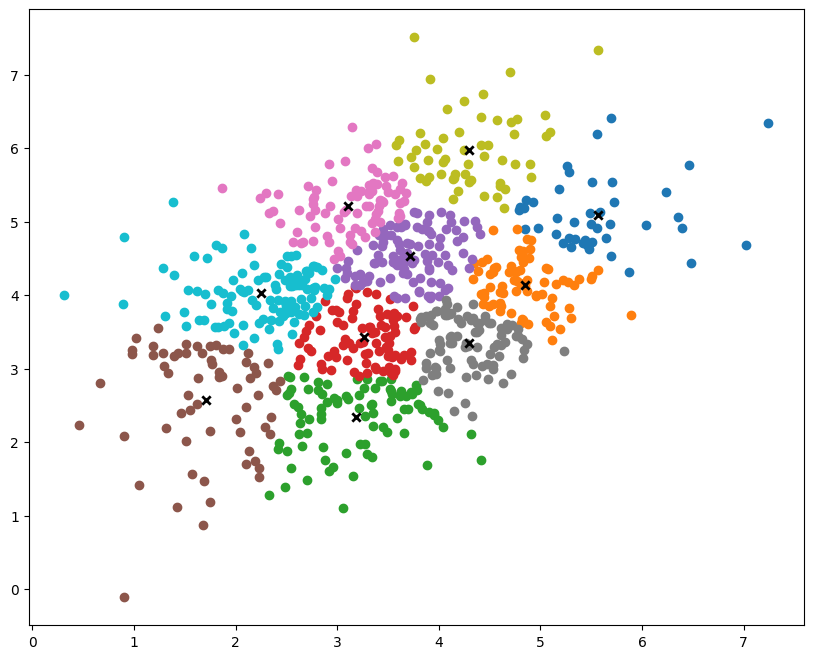

Best silhouette score -0.9928599186544155 was achieved for K_Value 10


In [8]:
for k_val in K_values:
    model = MyKMeansClustering(K = k_val)
    print(f'Graph for K value = {k_val}')
    model.predict(X_train)      
    curr_silhouette_score = model.silhouette_score()
    
    if curr_silhouette_score > best_silhouette_coefficient:
        best_K_value = k_val
        best_silhouette_coefficient = curr_silhouette_score

print(f'Best silhouette score {best_silhouette_coefficient} was achieved for K_Value {best_K_value}')


- since the silhouette score is close to -1 this indicates that the data points are not well defined for us to cluster them and therefore we get overlapping clusters as can be seen from the plots for respective k values.

----
# Comparison with Scikit-Learn

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

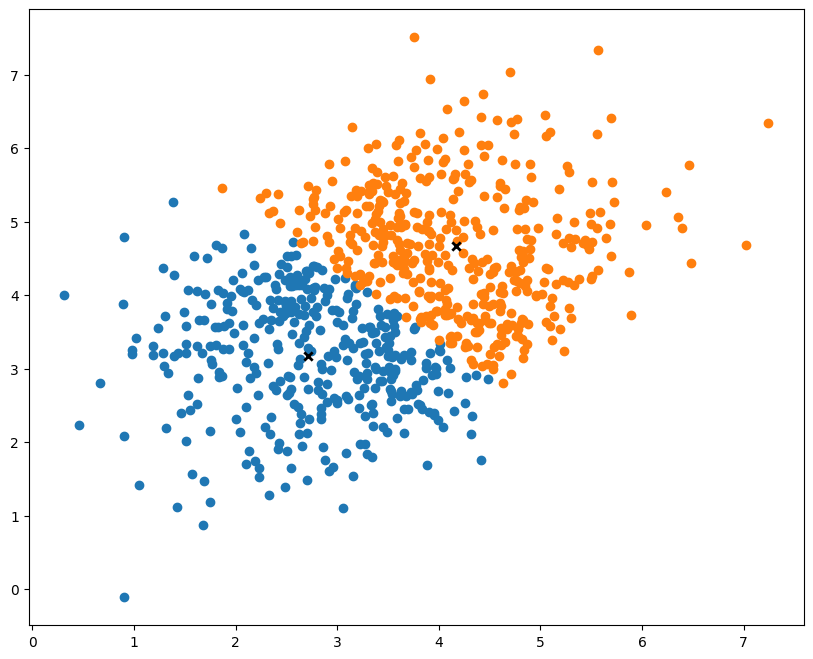

For training data, accuracy of my custom model =  0.51375


In [10]:
Mymodel = MyKMeansClustering(K = 2, plotting = False)
train = pd.read_csv('ds2_train.csv')

X_train = train[['x_1', 'x_2']].to_numpy()
y_train = train['y'].to_numpy()

predictions_training_mymodel = Mymodel.fit_acc_to_label(Mymodel.predict(X_train), y_train)      # stores the class labels which are returned by the model
print("For training data, accuracy of my custom model = ", np.mean(predictions_training_mymodel == y_train))   # here model's predictions are compared with the actual class labels



For Training Data, Accuracy of Scikit-Learn model = 0.52


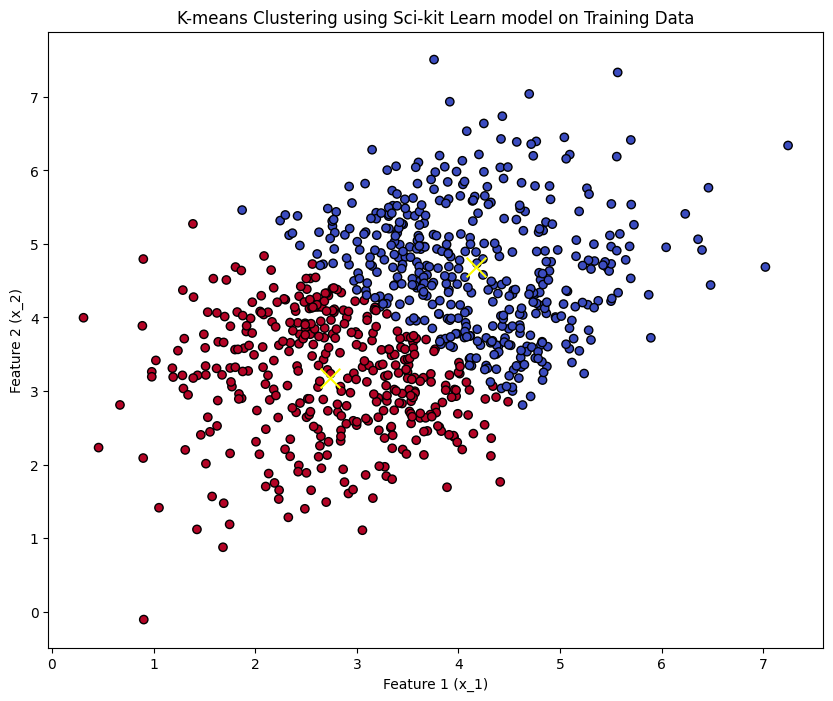

In [11]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

y_train_pred = kmeans.predict(X_train)      #stores which data sample belongs to which cluster
accuracy_train = accuracy_score(y_train, y_train_pred)

plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_pred, cmap='coolwarm', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='yellow', s=200)
plt.title('K-means Clustering using Sci-kit Learn model on Training Data')
plt.xlabel('Feature 1 (x_1)')
plt.ylabel('Feature 2 (x_2)')
print(f"\n\nFor Training Data, Accuracy of Scikit-Learn model = {accuracy_train:.2f}")

Graph for clusters based on training Data


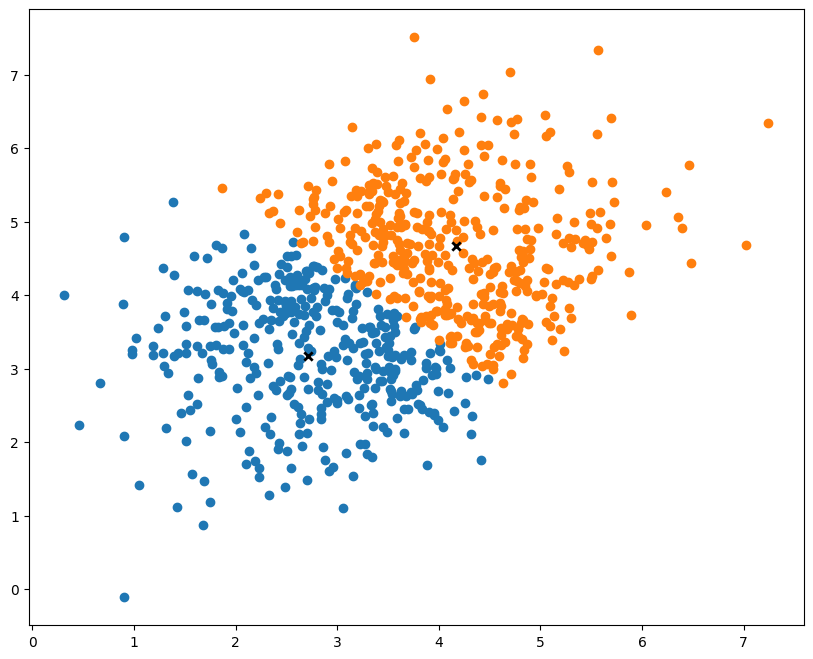

Graph for clusters based on test Data


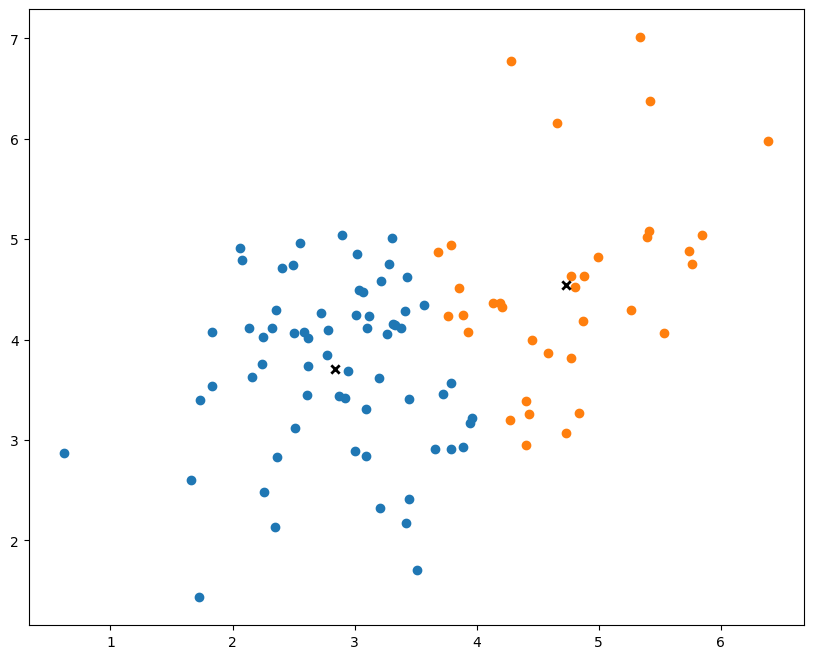

For Test Data, accuracy of my custom model =  0.71


In [12]:
print('Graph for clusters based on training Data')

Mymodel.predict(X_train)
test = pd.read_csv('ds2_test.csv')
X_test = test[['x_1', 'x_2']].to_numpy()
y_test = test['y'].to_numpy()

print('Graph for clusters based on test Data')
predictions_test_mymodel = Mymodel.fit_acc_to_label(Mymodel.predict(X_test), y_test)
print('For Test Data, accuracy of my custom model = ', np.mean(predictions_test_mymodel == y_test))

For Test Data, Accuracy of Scikit-Learn model = 0.52


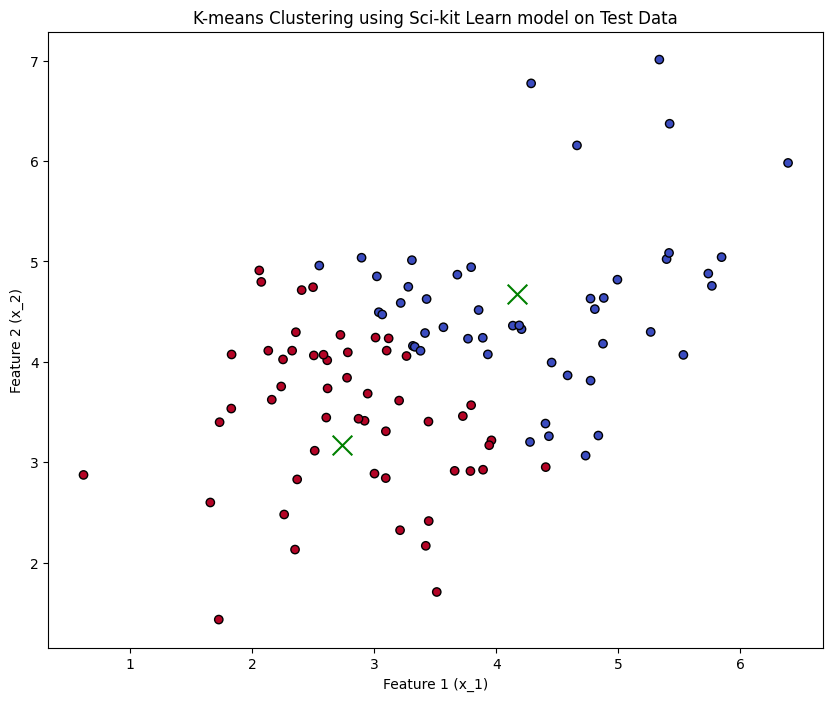

In [13]:
y_test_pred = kmeans.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, cmap='coolwarm', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='green', s=200)
plt.title('K-means Clustering using Sci-kit Learn model on Test Data')
plt.xlabel('Feature 1 (x_1)')
plt.ylabel('Feature 2 (x_2)')
print(f"For Test Data, Accuracy of Scikit-Learn model = {accuracy_train:.2f}")
